In [1]:
#Import libraries

import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.axes_grid1 import make_axes_locatable 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
min_max_scaler = preprocessing.MinMaxScaler()

In [2]:
#load data set:

dataset_path = '/Users/elahehkazemi/Desktop/3d paper/copolymer properties predicting/Dataset.xlsx'
df_dataset = pd.read_excel(dataset_path)
#should change here for other models
Y = np.array(df_dataset['Density(gcm-³)_simulated'], dtype=float)

# Load descriptors

Descriptors = pd.ExcelFile('/Users/elahehkazemi/Desktop/3d paper/copolymer properties predicting/Descriptors.xlsx')
# Function to load and process descriptors
def load_and_process_descriptors(Descriptors):
    descriptors_df = pd.DataFrame()
    for num in range(12):
        descriptors = pd.read_excel(Descriptors, f'descriptors.xls_{num}')
        descriptors_df = pd.concat([descriptors_df, descriptors], axis=1)
    return descriptors_df.values[:, :]

# Process descriptors
Descriptors= load_and_process_descriptors(Descriptors)

print(Descriptors.shape)
#scale descriptors
descriptors_scale = min_max_scaler.fit_transform(Descriptors)


(140, 2852)


Fitting 5 folds for each of 168 candidates, totalling 840 fits


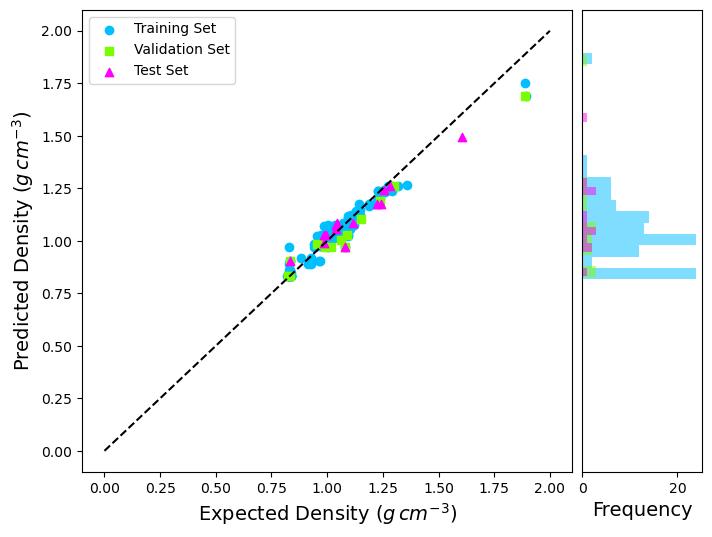

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2

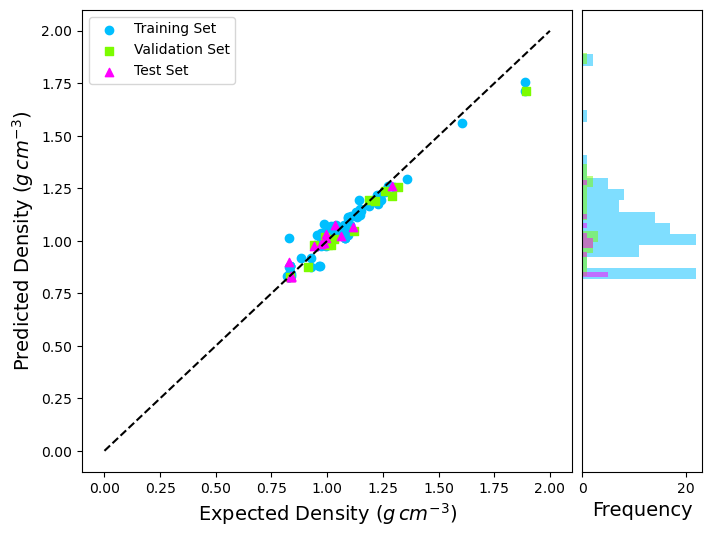

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=5

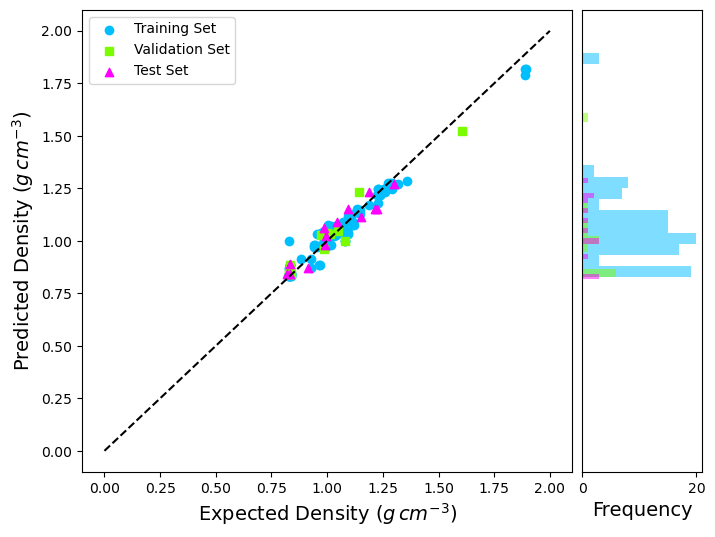


Average Metrics Across 3 Models:
Average R^2 Train: 0.9502577193345649
Average R^2 Val: 0.9365132205386644
Average R^2 Test: 0.9180876818112464
Average MSE Train: 0.0016777183023116132
Average MSE Val: 0.003757557694279205
Average MSE Test: 0.0020649498524570905
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_dep

In [3]:
# Single-task RF with all descriptors
def run_rf_model(X, Y, random_state_split_1, random_state_split_2):
    # Splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state_split_1)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=random_state_split_2)

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [100,150,200,250,300,400,500],
        'max_depth': [10, 20, 80, 100],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5,12],
        'min_samples_leaf': [1]
    }

    # Initialize and run the RandomForest model
    rf_model = RandomForestRegressor(random_state=1)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, Y_train)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Make predictions
    predictions_train = best_estimator.predict(X_train)
    predictions_val = best_estimator.predict(X_val)
    predictions_test = best_estimator.predict(X_test)

    # Compute MAE, MSE, and R2 for train, val, and test sets
    result_dict = {
        "mae_train": mean_absolute_error(Y_train, predictions_train),
        "r2_train": r2_score(Y_train, predictions_train),
        "mse_train": mean_squared_error(Y_train, predictions_train),
        "mae_val": mean_absolute_error(Y_val, predictions_val),
        "r2_val": r2_score(Y_val, predictions_val),
        "mse_val": mean_squared_error(Y_val, predictions_val),
        "mae_test": mean_absolute_error(Y_test, predictions_test),
        "r2_test": r2_score(Y_test, predictions_test),
        "mse_test": mean_squared_error(Y_test, predictions_test)
    }

 
    # Return results for averaging
    return result_dict, Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test

# Function to create the scatter plot with histograms
def plot_results(Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test):
    # Create a figure and axis for the scatter plot
    fig, ax_scatter = plt.subplots(figsize=(8, 6))

    # Create scatter plots for each set
    ax_scatter.scatter(Y_train, predictions_train, color='deepskyblue', label='Training Set', marker='o')
    ax_scatter.scatter(Y_val, predictions_val, color='lawngreen', label='Validation Set', marker='s')
    ax_scatter.scatter(Y_test, predictions_test, color='magenta', label='Test Set', marker='^')

    # Plot the line y=x for reference
    ax_scatter.plot([0, 2], [0, 2], color='black', linestyle='--')

    # Labeling the scatter plot
    ax_scatter.set_xlabel('Expected Density ($g \,cm^{-3}$)', fontsize=14, fontname='sans serif')
    ax_scatter.set_ylabel('Predicted Density ($g \,cm^{-3}$)', fontsize=14, fontname='sans serif')
    ax_scatter.legend()

    # Create a divider for the histograms
    divider = make_axes_locatable(ax_scatter)

    # Create a new axis for the histogram on the right side
    ax_histx = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax_scatter)

    # Create marginal histograms for the x-axis (Expected Density)
    ax_histx.hist(Y_train, bins=20, color='deepskyblue', alpha=0.5, orientation='horizontal', label='Training Set')
    ax_histx.hist(Y_val, bins=20, color='lawngreen', alpha=0.5, orientation='horizontal', label='Validation Set')
    ax_histx.hist(Y_test, bins=20, color='magenta', alpha=0.5, orientation='horizontal', label='Test Set')

    # Hide the y-axis of the histogram
    ax_histx.get_yaxis().set_visible(False)

    # Labeling the histogram
    ax_histx.set_xlabel('Frequency', fontsize=14, fontname='sans serif')

    # Show plot
    plt.show()

# List to store results from all models
all_results = []

# Running the model 3 times with different random states
random_states = [(207, 200), (184, 42), (299, 42)]

for rs in random_states:
    result, Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test = run_rf_model(descriptors_scale, Y, rs[0], rs[1])
    all_results.append(result)
    plot_results(Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test)

# Compute the average metrics across the 3 models
avg_r2_train = np.mean([result['r2_train'] for result in all_results])
avg_r2_val = np.mean([result['r2_val'] for result in all_results])
avg_r2_test = np.mean([result['r2_test'] for result in all_results])

avg_mse_train = np.mean([result['mse_train'] for result in all_results])
avg_mse_val = np.mean([result['mse_val'] for result in all_results])
avg_mse_test = np.mean([result['mse_test'] for result in all_results])

# Print the average metrics
print("\nAverage Metrics Across 3 Models:")
print(f"Average R^2 Train: {avg_r2_train}")
print(f"Average R^2 Val: {avg_r2_val}")
print(f"Average R^2 Test: {avg_r2_test}")
print(f"Average MSE Train: {avg_mse_train}")
print(f"Average MSE Val: {avg_mse_val}")
print(f"Average MSE Test: {avg_mse_test}")


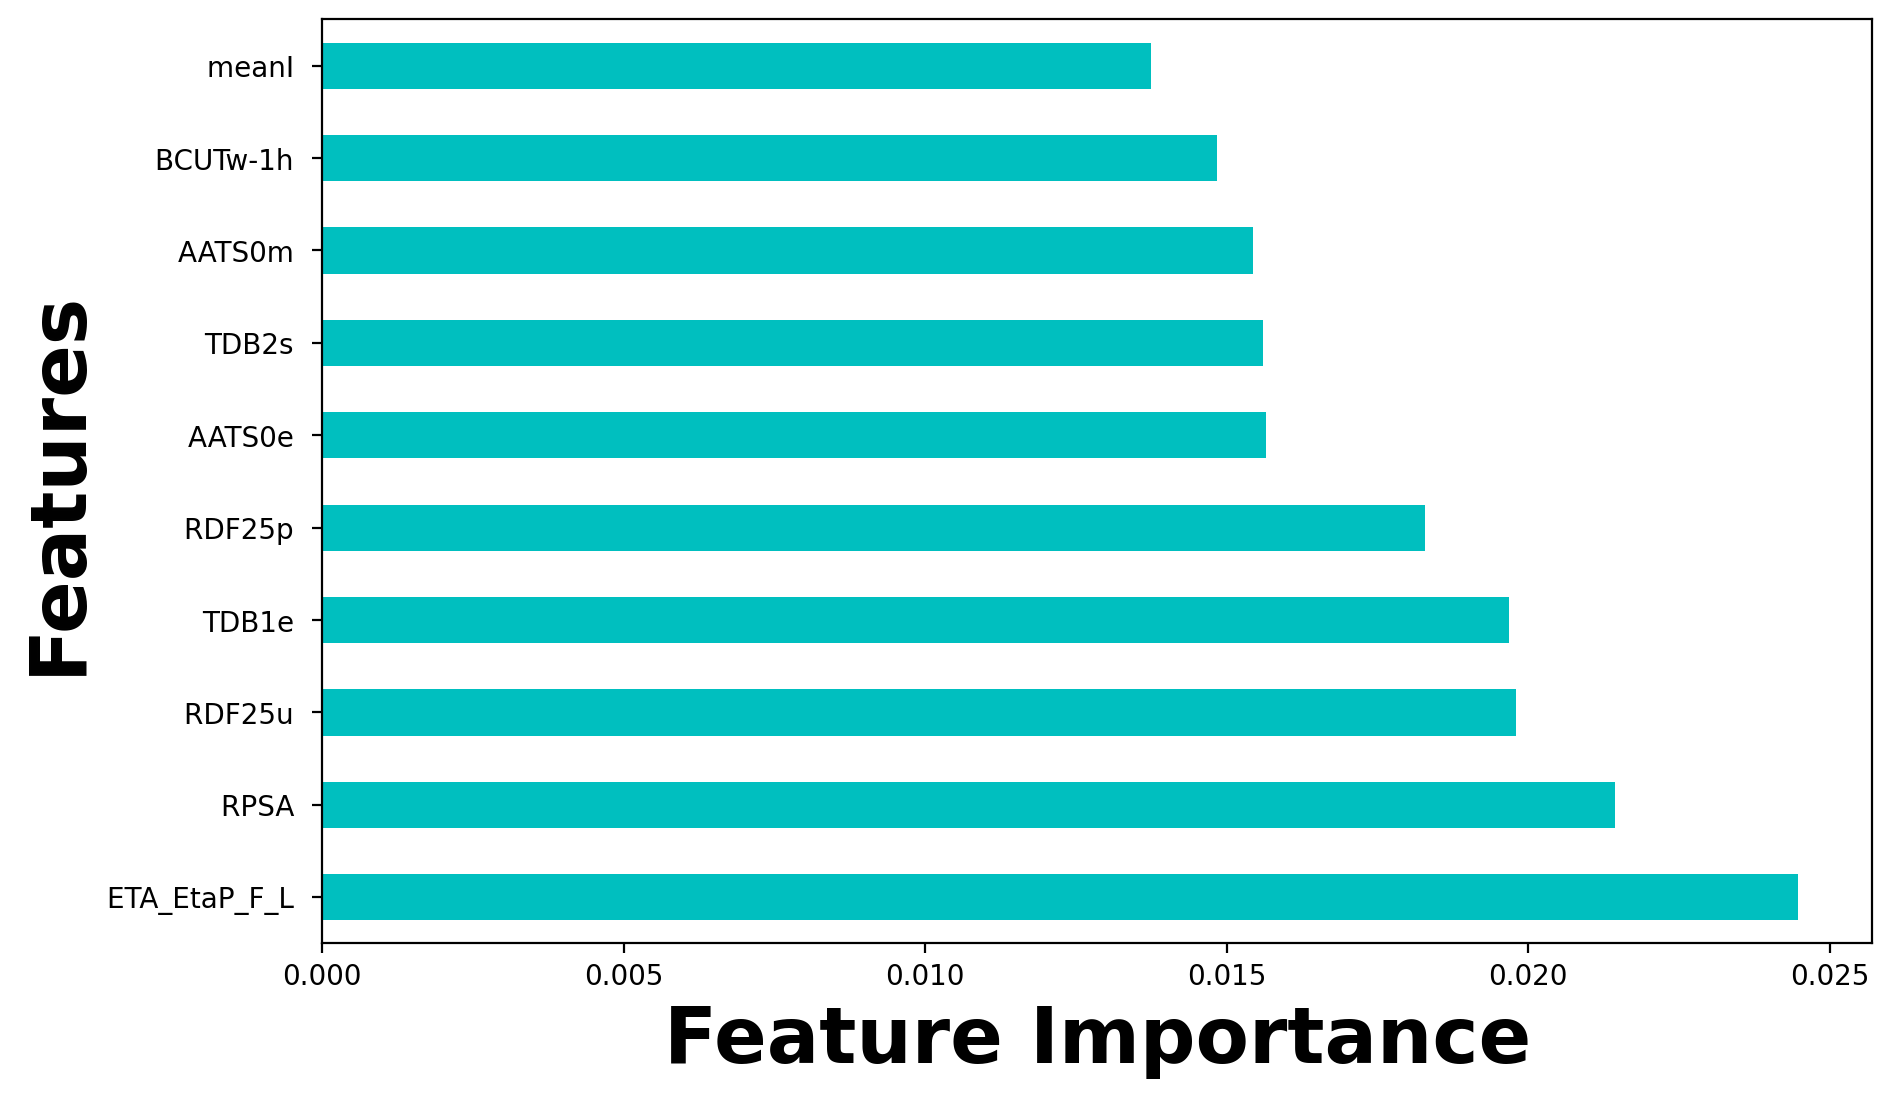

In [4]:
#Important feature analysis

# Load dataset
dataset_path = '/Users/elahehkazemi/Desktop/3d paper/copolymer properties predicting/Dataset.xlsx'
df_dataset = pd.read_excel(dataset_path)
#should change here for other models
Y = np.array(df_dataset['Density(gcm-³)_simulated'], dtype=float)

# Load descriptors

Descriptors = pd.ExcelFile('/Users/elahehkazemi/Desktop/3d paper/copolymer properties predicting/Descriptors.xlsx')
# Function to load and process descriptors
def load_and_process_descriptors(Descriptors):
    descriptors_df = pd.DataFrame()
    for num in range(12):
        descriptors = pd.read_excel(Descriptors, f'descriptors.xls_{num}')
        descriptors_df = pd.concat([descriptors_df, descriptors], axis=1)
    return descriptors_df  # Return the DataFrame

# Process descriptors, keep DataFrame with column names
descriptors_df = load_and_process_descriptors(Descriptors)

# Save the column names before converting to NumPy array
column_names = descriptors_df.columns

# Scale descriptors
min_max_scaler = MinMaxScaler()
descriptors_scale = min_max_scaler.fit_transform(descriptors_df)



X_train, X_test, Y_train, Y_test = train_test_split(descriptors_scale, 
                                                                Y, test_size=0.2, 
                                                                random_state=207)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, 
                                                              test_size=0.5, 
                                                              random_state=200)


# Initialize the model
model = RandomForestRegressor(n_estimators=50, max_depth=80, max_features='sqrt', min_samples_split=2,
                              min_samples_leaf=1, random_state=1)

# Fit the model on the training data
model.fit(X_train, Y_train)

# Plot feature importance
importance = model.feature_importances_
#importance_df = pd.Series(importance, index=X_train.columns)  # Use correct column names
importance_df = pd.Series(importance, index=column_names).sort_values()

fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

importance_df.nlargest(10).plot(kind='barh', color='c')
ax.set_xlabel('Feature Importance', fontsize=28, fontweight='bold', fontname='sans serif')
ax.set_ylabel('Features', fontsize=28, fontweight='bold', fontname='sans serif')
#plt.title('Top Feature Importances', fontsize=22, fontname='Times New Roman')


plt.show()

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=250; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimators=250; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=12, n_estimator

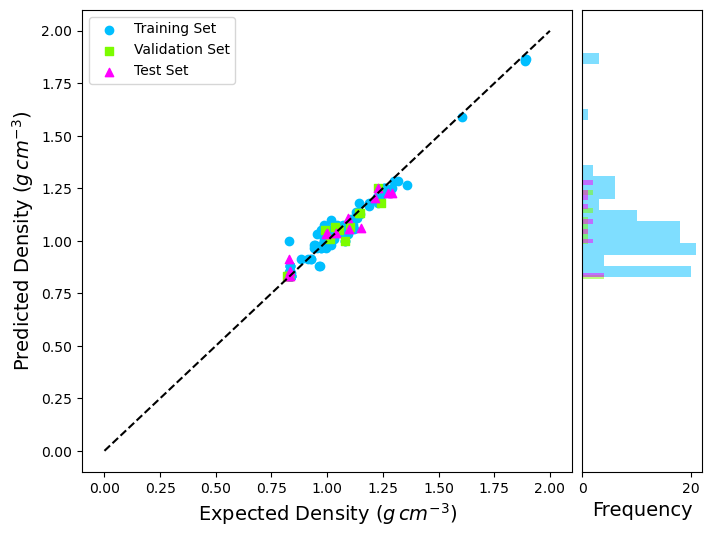

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.7s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.2s
[CV] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_esti

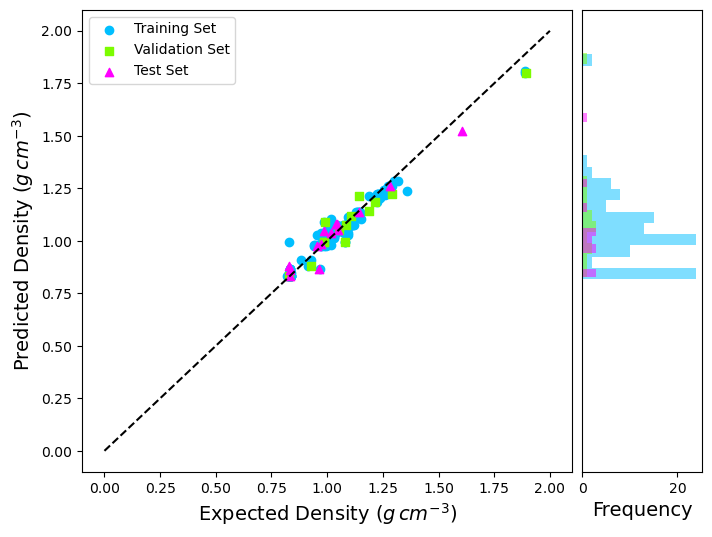

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=

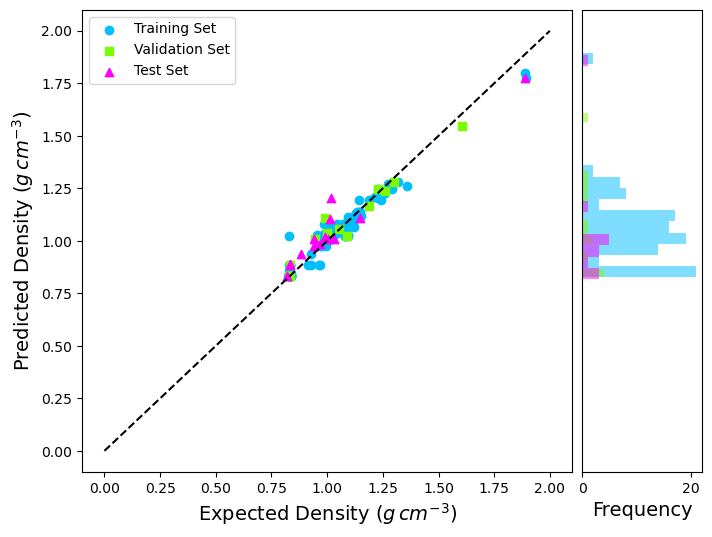


Average Metrics Across 3 Models:
Average R^2 Train: 0.9557196181771621
Average R^2 Val: 0.9483323156762031
Average R^2 Test: 0.9304291462715432
Average MSE Train: 0.00149485219502721
Average MSE Val: 0.0021137052042114394
Average MSE Test: 0.003104547152077934
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END max_depth

In [5]:
# Single-task RF with important descriptors

top_features = importance_df.nlargest(10).index

# Map the feature names to their respective integer indices
feature_indices = [descriptors_df.columns.get_loc(feature) for feature in top_features]

# Select these top features from the scaled descriptor array
X_top = descriptors_scale[:, feature_indices]

# List of random state pairs for splitting


def run_rf_model(X, Y, random_state_split_1, random_state_split_2):
    # Splitting the dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_top, Y, test_size=0.2, random_state=random_state_split_1)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=random_state_split_2)

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [100,150,200,250,300,400,500],
        'max_depth': [10, 20, 80, 100],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5,12],
        'min_samples_leaf': [1]
    }

    # Initialize and run the RandomForest model
    rf_model = RandomForestRegressor(random_state=1)

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, Y_train)

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Make predictions
    predictions_train = best_estimator.predict(X_train)
    predictions_val = best_estimator.predict(X_val)
    predictions_test = best_estimator.predict(X_test)

    # Compute MAE, MSE, and R2 for train, val, and test sets
    result_dict = {
        "mae_train": mean_absolute_error(Y_train, predictions_train),
        "r2_train": r2_score(Y_train, predictions_train),
        "mse_train": mean_squared_error(Y_train, predictions_train),
        "mae_val": mean_absolute_error(Y_val, predictions_val),
        "r2_val": r2_score(Y_val, predictions_val),
        "mse_val": mean_squared_error(Y_val, predictions_val),
        "mae_test": mean_absolute_error(Y_test, predictions_test),
        "r2_test": r2_score(Y_test, predictions_test),
        "mse_test": mean_squared_error(Y_test, predictions_test)
    }

    # Return results for averaging
    return result_dict, Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test

# Function to create the scatter plot with histograms
def plot_results(Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test):
    # Create a figure and axis for the scatter plot
    fig, ax_scatter = plt.subplots(figsize=(8, 6))

    # Create scatter plots for each set
    ax_scatter.scatter(Y_train, predictions_train, color='deepskyblue', label='Training Set', marker='o')
    ax_scatter.scatter(Y_val, predictions_val, color='lawngreen', label='Validation Set', marker='s')
    ax_scatter.scatter(Y_test, predictions_test, color='magenta', label='Test Set', marker='^')

    # Plot the line y=x for reference
    ax_scatter.plot([0, 2], [0, 2], color='black', linestyle='--')

    # Labeling the scatter plot
    ax_scatter.set_xlabel('Expected Density ($g \,cm^{-3}$)', fontsize=14, fontname='sans serif')
    ax_scatter.set_ylabel('Predicted Density ($g \,cm^{-3}$)', fontsize=14, fontname='sans serif')
    ax_scatter.legend()

    # Create a divider for the histograms
    divider = make_axes_locatable(ax_scatter)

    # Create a new axis for the histogram on the right side
    ax_histx = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax_scatter)

    # Create marginal histograms for the x-axis (Expected Density)
    ax_histx.hist(Y_train, bins=20, color='deepskyblue', alpha=0.5, orientation='horizontal', label='Training Set')
    ax_histx.hist(Y_val, bins=20, color='lawngreen', alpha=0.5, orientation='horizontal', label='Validation Set')
    ax_histx.hist(Y_test, bins=20, color='magenta', alpha=0.5, orientation='horizontal', label='Test Set')

    # Hide the y-axis of the histogram
    ax_histx.get_yaxis().set_visible(False)

    # Labeling the histogram
    ax_histx.set_xlabel('Frequency', fontsize=14, fontname='sans serif')

    # Show plot
    plt.show()

# List to store results from all models
all_results = []

# Running the model 3 times with different random states
random_states = [(497, 42), (251, 100), (368, 1)]

for rs in random_states:
    result, Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test = run_rf_model(descriptors_scale, Y, rs[0], rs[1])
    all_results.append(result)
    plot_results(Y_train, predictions_train, Y_val, predictions_val, Y_test, predictions_test)

# Compute the average metrics across the 3 models
avg_r2_train = np.mean([result['r2_train'] for result in all_results])
avg_r2_val = np.mean([result['r2_val'] for result in all_results])
avg_r2_test = np.mean([result['r2_test'] for result in all_results])

avg_mse_train = np.mean([result['mse_train'] for result in all_results])
avg_mse_val = np.mean([result['mse_val'] for result in all_results])
avg_mse_test = np.mean([result['mse_test'] for result in all_results])

# Print the average metrics
print("\nAverage Metrics Across 3 Models:")
print(f"Average R^2 Train: {avg_r2_train}")
print(f"Average R^2 Val: {avg_r2_val}")
print(f"Average R^2 Test: {avg_r2_test}")
print(f"Average MSE Train: {avg_mse_train}")
print(f"Average MSE Val: {avg_mse_val}")
print(f"Average MSE Test: {avg_mse_test}")